# 1. 다양한 그래프 알고리즘

- 알고리즘 종류  
DFS/BFS와 최단 경로에서 다룬 내용은 모두 그래프 알고리즘의 한 유형  
크루스칼 알고리즘 - 그리디 알고리즘  
위상 정렬 알고리즘 - 큐,스택 자료구조 활용  

- 복습  
그래프: 노드와 노드 사이의 간선의 정보를 갖는 자료구조  
서로 다른 개체가 연결, 도시 연결 -> 그래프 알고리즘을 떠올리기  

- 트리  
최소 힙은 항상 부모 노드가 자식 노드보다 크기가 작은 자료구조로서 트리 자료구조에 속함  

- 인접 행렬/인접 리스트  
인접 행렬은 플로이드 워셜 알고리즘(노드가 적으면)  
인접 리스트는 큐를 이용하는 다익스트라 최단 경로

## 서로소 집합

서로소 부분 집합들로 나누어진 원소들의 데이터를 처리하기 위한 자료구조  
union: 합치는 연산  
find:어떤 집합인지 알려줌

번호가 작으면 부모

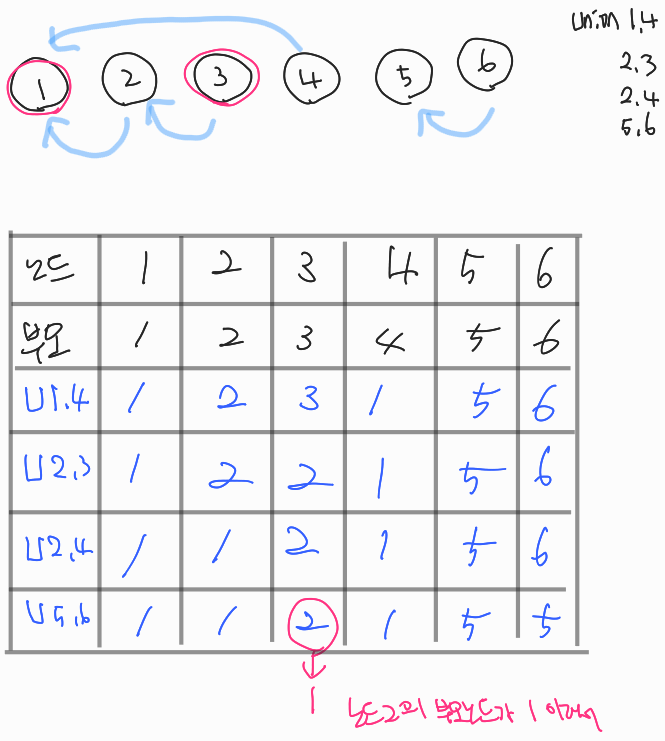

In [1]:
def find_parent(parent, x):
    if parent[x] != x:
        return find_parent(parent, parent[x])
    return x

def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

v, e = map(int, input().split())
parent = [0] * (v + 1)

for i in range(1, v + 1):
    parent[i] = i

for i in range(e):
    a, b = map(int, input().split())
    union_parent(parent, a, b)

print('각 원소가 속한 집합: ', end='')
for i in range(1, v + 1):
    print(find_parent(parent, i), end=' ')

print()

print('부모 테이블: ', end='')
for i in range(1, v + 1):
    print(parent[i], end=' ')

6 4
1 4
2 3
2 4
5 6
각 원소가 속한 집합: 1 1 1 1 5 5 
부모 테이블: 1 1 2 1 5 5 

- 좀 더 효율적으로 수정

In [4]:
def find_parent(parent, x):
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

v, e = map(int, input().split())
parent = [0] * (v + 1) 

for i in range(1, v + 1):
    parent[i] = i

for i in range(e):
    a, b = map(int, input().split())
    union_parent(parent, a, b)

print('각 원소가 속한 집합: ', end='')
for i in range(1, v + 1):
    print(find_parent(parent, i), end=' ')

print()

print('부모 테이블: ', end='')
for i in range(1, v + 1):
    print(parent[i], end=' ')

6 4
1 4 
2 3
2 4
5 6
각 원소가 속한 집합: 1 1 1 1 5 5 
부모 테이블: 1 1 1 1 5 5 

- 사이클 판별

In [5]:
def find_parent(parent, x):
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

v, e = map(int, input().split())
parent = [0] * (v + 1)

for i in range(1, v + 1):
    parent[i] = i

cycle = False 

for i in range(e):
    a, b = map(int, input().split())
    if find_parent(parent, a) == find_parent(parent, b):
        cycle = True
        break
    else:
        union_parent(parent, a, b)

if cycle:
    print("사이클이 발생했습니다.")
else:
    print("사이클이 발생하지 않았습니다.")

3 3
1 2
1 3
2 3
사이클이 발생했습니다.


## 1.2 신장트리

하나의 그래프가 있을 때 모든 노드를 포함하면서 사이클이 존재하지 않는 부분 그래프  
트리 성립 조건:모든 노드가 포함되어 서로 연결되면서 사이클이 존재하지 않는 다는 조건

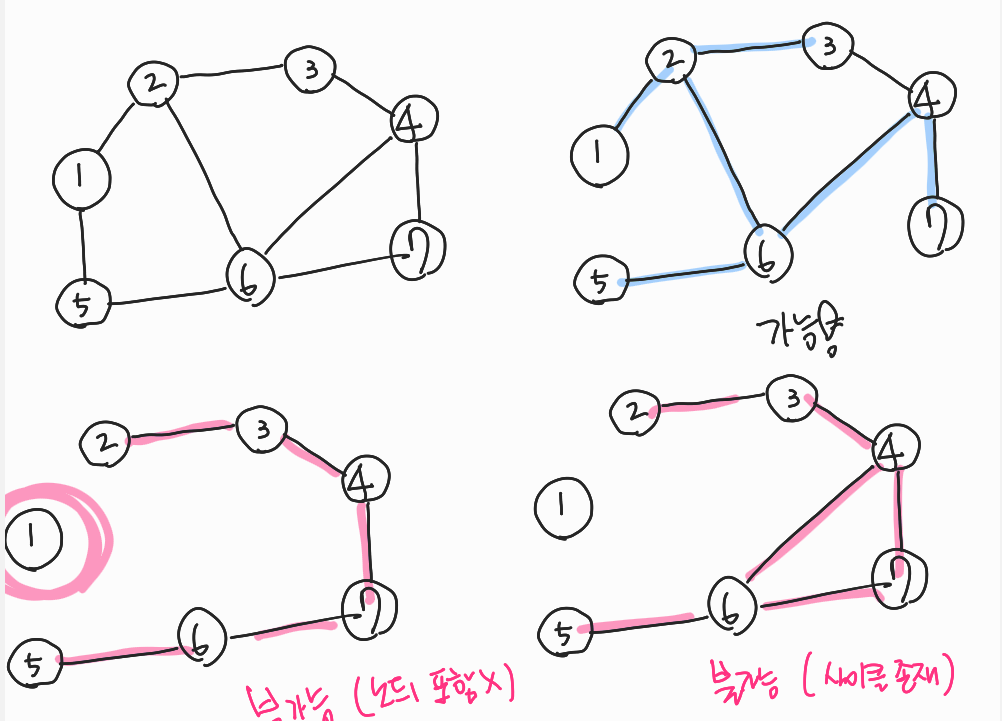

### 크루스칼 알고리즘

가장 최소한으로 전체 노드를 연결하는 알고리즘

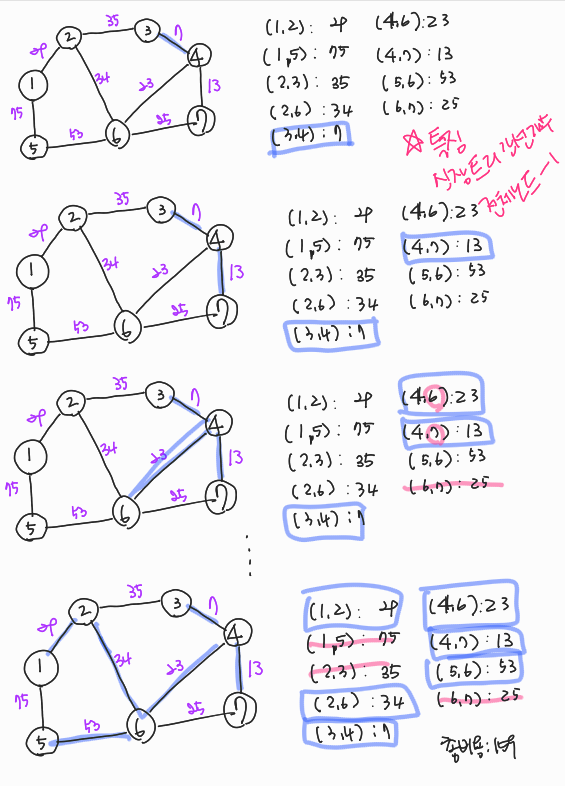

## 1.3 위상정렬

모든 노드를 방향성에 거스르지 않도록 순서대로 나열하는 것